In [1]:
#Ucitavanje podataka

In [2]:
import pandas as pd

In [3]:
from matplotlib import pyplot as plt

In [4]:
from sklearn.decomposition import PCA

In [5]:
from matplotlib.colors import ListedColormap

In [6]:
import numpy as np

In [7]:
df = pd.read_csv('./Sensorless_drive_diagnosis.txt', delimiter = " ", header = None)

In [50]:
#%store df
df.all

<bound method NDFrame._add_numeric_operations.<locals>.all of                  0             1         2         3             4         5   \
0     -3.014600e-07  8.260300e-06 -0.000012 -0.000002 -1.438600e-06 -0.000021   
1      2.913200e-06 -5.247700e-06  0.000003 -0.000006  2.778900e-06 -0.000004   
2     -2.951700e-06 -3.184000e-06 -0.000016 -0.000001 -1.575300e-06  0.000017   
3     -1.322600e-06  8.820100e-06 -0.000016 -0.000005 -7.282900e-07  0.000004   
4     -6.836600e-08  5.666300e-07 -0.000026 -0.000006 -7.940600e-07  0.000013   
...             ...           ...       ...       ...           ...       ...   
58504 -9.982500e-06  1.854900e-06 -0.000021  0.000021 -5.910200e-06 -0.000098   
58505 -1.055400e-05  1.983500e-05  0.000031 -0.000018 -1.061600e-04  0.000292   
58506 -5.857700e-06  1.859400e-05 -0.000102 -0.000003  3.827500e-06  0.000117   
58507 -4.441100e-06  3.396900e-05 -0.000442  0.000005  6.500800e-06  0.000087   
58508 -8.853300e-06  5.225900e-05  0.000072  0.

In [49]:
df.describe().all

<bound method NDFrame._add_numeric_operations.<locals>.all of                  0             1             2             3             4   \
count  58500.000000  5.850000e+04  5.850000e+04  5.850000e+04  5.850000e+04   
mean      -0.000003  1.586384e-06  1.790967e-06 -9.678553e-07  1.644171e-06   
std        0.000026  4.596327e-05  2.268881e-04  1.131000e-05  3.972356e-05   
min       -0.000678 -2.162700e-03 -2.289400e-03 -6.954600e-04 -4.045800e-04   
25%       -0.000007 -1.443925e-05 -7.235050e-05 -5.416650e-06 -1.474400e-05   
50%       -0.000003  8.825150e-07  5.144200e-07 -1.059250e-06  7.557500e-07   
75%        0.000002  1.877725e-05  7.520175e-05  3.553500e-06  1.906300e-05   
max        0.005784  4.525300e-03  5.237700e-03  1.453100e-03  8.245100e-04   

                 5             6             7             8             9   \
count  5.850000e+04  58500.000000  58500.000000  58500.000000  58500.000000   
mean  -6.255035e-08      0.001921      0.001920      0.001918     -0

In [9]:
X = df.iloc[:, :-1]
#%store X
X

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,-3.014600e-07,8.260300e-06,-0.000012,-0.000002,-1.438600e-06,-0.000021,0.031718,0.031710,0.031721,-0.032963,...,6.0168,-0.63308,2.9646,8.1198,-1.4961,-1.4961,-1.4961,-1.4996,-1.4996,-1.4996
1,2.913200e-06,-5.247700e-06,0.000003,-0.000006,2.778900e-06,-0.000004,0.030804,0.030810,0.030806,-0.033520,...,3.6048,-0.59314,7.6252,6.1690,-1.4967,-1.4967,-1.4967,-1.5005,-1.5005,-1.5005
2,-2.951700e-06,-3.184000e-06,-0.000016,-0.000001,-1.575300e-06,0.000017,0.032877,0.032880,0.032896,-0.029834,...,5.8007,-0.63252,2.7784,5.3017,-1.4983,-1.4983,-1.4982,-1.4985,-1.4985,-1.4985
3,-1.322600e-06,8.820100e-06,-0.000016,-0.000005,-7.282900e-07,0.000004,0.029410,0.029401,0.029417,-0.030156,...,23.3960,-0.62289,6.5534,6.2606,-1.4963,-1.4963,-1.4963,-1.4975,-1.4975,-1.4976
4,-6.836600e-08,5.666300e-07,-0.000026,-0.000006,-7.940600e-07,0.000013,0.030119,0.030119,0.030145,-0.031393,...,5.0582,-0.63010,4.5155,9.5231,-1.4958,-1.4958,-1.4958,-1.4959,-1.4959,-1.4959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58504,-9.982500e-06,1.854900e-06,-0.000021,0.000021,-5.910200e-06,-0.000098,-0.083417,-0.083419,-0.083398,-0.182340,...,7.3939,-0.52907,1.4641,7.0032,-1.5024,-1.5025,-1.5023,-1.4933,-1.4933,-1.4933
58505,-1.055400e-05,1.983500e-05,0.000031,-0.000018,-1.061600e-04,0.000292,-0.085131,-0.085151,-0.085182,-0.184320,...,3.8550,-0.51971,3.3275,2.3072,-1.5024,-1.5025,-1.5024,-1.4925,-1.4925,-1.4926
58506,-5.857700e-06,1.859400e-05,-0.000102,-0.000003,3.827500e-06,0.000117,-0.081989,-0.082008,-0.081906,-0.186140,...,12.6940,-0.51103,20.9250,9.0437,-1.5035,-1.5035,-1.5039,-1.4911,-1.4912,-1.4910
58507,-4.441100e-06,3.396900e-05,-0.000442,0.000005,6.500800e-06,0.000087,-0.081500,-0.081534,-0.081093,-0.183630,...,4.3924,-0.52033,1.3890,10.7430,-1.5029,-1.5029,-1.5030,-1.4932,-1.4932,-1.4931


In [10]:
y = df.iloc[:, -1]
#%store y
y

0         1
1         1
2         1
3         1
4         1
         ..
58504    11
58505    11
58506    11
58507    11
58508    11
Name: 48, Length: 58509, dtype: int64

In [11]:
#Provera da li postoje nedostajuce vrednosti

In [12]:
potentialNull = df.isna().any()
#potentialNull

In [13]:
ind = -1
for i in range(len(potentialNull)):
    if potentialNull[i] == True:
        print(f'Atribut A{i} ima nedostajuce vrednosti')
        ind += 1
if ind == -1:
    print('Nijedan atribut nema nedostajuce vrednosti')

Nijedan atribut nema nedostajuce vrednosti


In [14]:
#Provera balansiranosti klasa

In [15]:
classValuesCount = {}
for instance in y:
    if instance in classValuesCount.keys():
        classValuesCount[instance] += 1
    else:
        classValuesCount[instance] = 1

Text(0.5, 1.0, 'Class distribution')

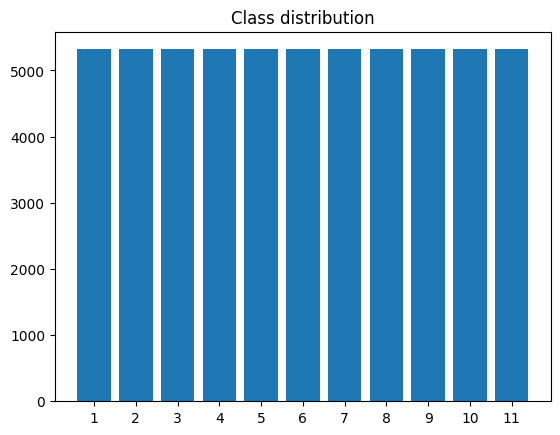

In [16]:
plt.bar(x=y.unique(), height=classValuesCount.values(), tick_label=y.unique())
plt.title('Class distribution')
#plt.savefig('class_distribution.png')

In [17]:
#pokusajmo da vizualizujemo nase podatke

In [18]:
pca = PCA(n_components=48)

In [19]:
pca.fit(X)

PCA(n_components=48)

In [20]:
pca.explained_variance_ratio_

array([5.84114942e-01, 1.53701245e-01, 1.26609540e-01, 7.78092062e-02,
       3.04794618e-02, 2.47166550e-02, 6.58821759e-04, 5.30402846e-04,
       5.09881928e-04, 4.22466957e-04, 3.99310619e-04, 2.62822444e-05,
       1.11709197e-05, 9.48008544e-06, 7.97052890e-07, 1.94708180e-07,
       7.75966121e-08, 3.74708551e-08, 1.36775163e-08, 8.38411527e-09,
       2.80437134e-09, 9.57336761e-10, 2.46526768e-10, 1.56551415e-10,
       4.32875170e-11, 4.12605212e-11, 3.73763890e-11, 3.34820800e-11,
       3.23239240e-11, 3.04551285e-11, 1.90026720e-11, 1.72668300e-11,
       1.43842071e-11, 1.19315443e-11, 3.39355248e-12, 2.17270168e-12,
       1.87705114e-12, 1.58522479e-12, 1.42685183e-12, 1.02635736e-12,
       8.96729308e-13, 7.48885649e-13, 1.98226105e-13, 1.13815790e-13,
       6.63125857e-16, 4.48760549e-16, 1.66127119e-16, 1.18680212e-16])

In [21]:
coveredVariance = 0
optimalNumOfComponents = 48

x1 = []
y1 = []
x2 = []
y2 = []

for numOfComponents in range(1, 49):
    coveredVarianceByComponent = pca.explained_variance_ratio_[numOfComponents-1] * 100
    coveredVariance += coveredVarianceByComponent
    x1.append(f'pca{numOfComponents}')
    x2.append(f'{numOfComponents}')
    y1.append(coveredVarianceByComponent)
    y2.append(coveredVariance)
    print(coveredVariance, '        ', coveredVarianceByComponent)
    if coveredVariance > 99:
        optimalNumOfComponents = numOfComponents
        break
        
x1 = np.array(x1)
x2 = np.array(x2)
y1 = np.array(y1)
y2 = np.array(y2) 

58.4114941601718          58.4114941601718
73.78161863645924          15.370124476287438
86.44257263997966          12.66095400352041
94.2234932559409          7.780920615961239
97.27143943313649          3.047946177195602
99.74310492922764          2.471665496091144


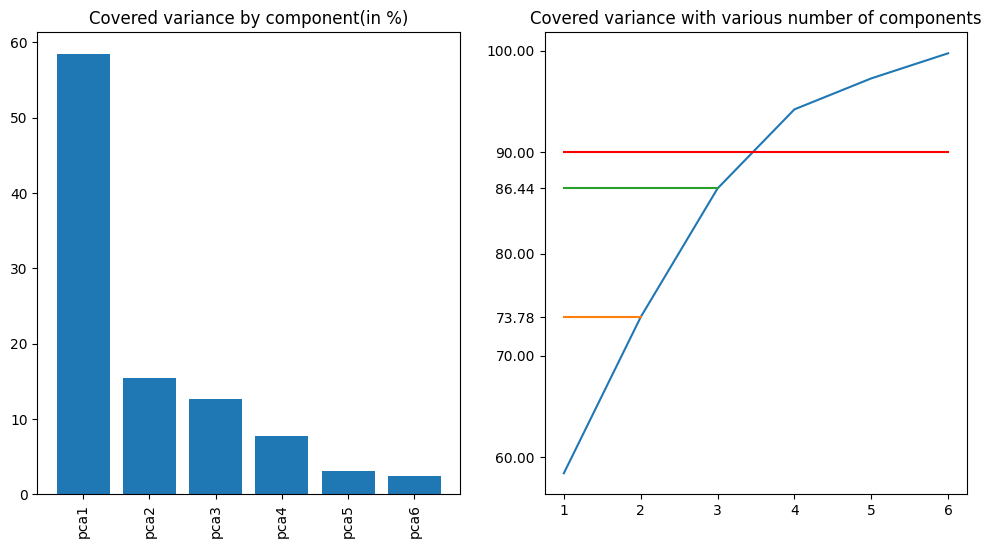

In [22]:
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(x1, y1)

plt.rcParams["figure.figsize"] = (12,6)
plt.xticks(rotation=90)

plt.title('Covered variance by component(in %)')


plt.subplot(1, 2, 2)
plt.plot(x2, y2)
plt.plot(x2, np.array([90 for i in range(len(y2))]), color='red')

plt.plot(np.array([0, 1]), [(y2[1]) for i in range(2)])
plt.plot(np.array([0, 1, 2]), [(y2[2]) for i in range(3)])

plt.yticks(list([60, 70, 80, 90, 100, y2[1], y2[2]]))

plt.title('Covered variance with various number of components')

plt.show()

In [23]:
pca3 = PCA(n_components=3)

In [24]:
pca3.fit(X)

PCA(n_components=3)

In [25]:
X_PCA3 = pd.DataFrame(pca3.transform(X))

In [26]:
error_categories = pd.Categorical(y)

In [27]:
color_list = ['red', 'blue', 'green', 'yellow', 'pink', 'purple', 'orange', 'brown', 'gray', 'magenta', 'cyan']

In [28]:
X_PCA2 = X_PCA3.iloc[:, :2]
#X_PCA2

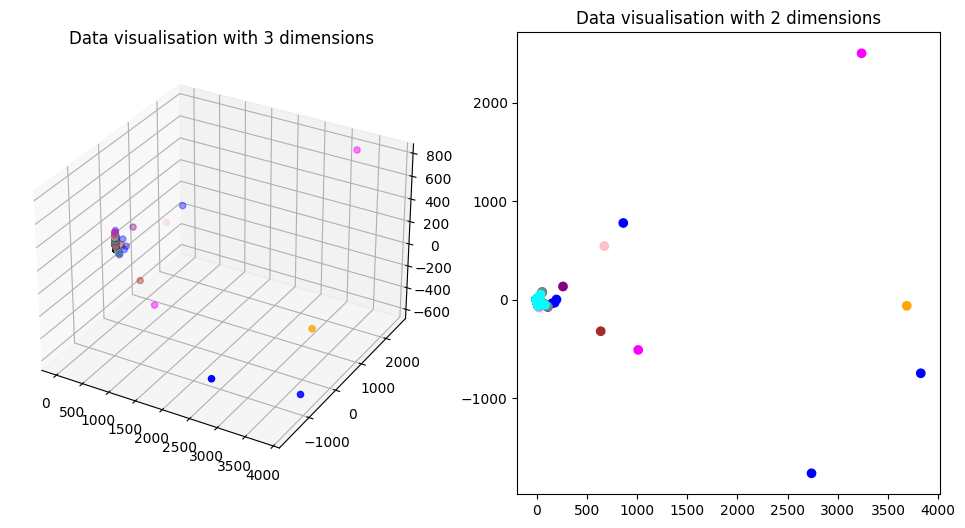

In [29]:
fig = plt.figure()
ax = plt.subplot(1, 2, 1, projection ='3d')
ax.scatter(X_PCA3[0], X_PCA3[1], X_PCA3[2], c = y, cmap=ListedColormap(color_list))
plt.title('Data visualisation with 3 dimensions')

plt.subplot(1, 2, 2)
plt.scatter(X_PCA2[0], X_PCA2[1], c = y, cmap=ListedColormap(color_list))
plt.title('Data visualisation with 2 dimensions')
plt.show()

In [30]:
#sa grafika vidimo oko 10 bas problematicnih outlier-a koje cemo pokusati da uklonimo

In [31]:
df_WO = df
for i in range(48):
    max_allowed = df_WO[i].mean() + 116*df_WO[i].std()
    min_allowed = df_WO[i].mean() - 116*df_WO[i].std()
    df_WO = df_WO[df_WO[i] >= min_allowed]
    df_WO = df_WO[df_WO[i] <= max_allowed]
df_WO.shape[0]

58500

In [32]:
X_WO = df_WO.iloc[:, :-1]

In [33]:
y_WO = df_WO.iloc[:, -1]

In [34]:
#probajmo sada ponovo da vizualizujemo nase podatke(ocekujemo da ce se odrzati skoro ista pokrivenost varijanse)

In [35]:
pca3_WO = PCA(n_components=3)

In [36]:
pca3_WO.fit(X_WO)

PCA(n_components=3)

In [37]:
X_WO_PCA3 = pd.DataFrame(pca3_WO.transform(X_WO))

In [38]:
X_WO_PCA2 = X_WO_PCA3.iloc[:, :2]
#X_WO_PCA2

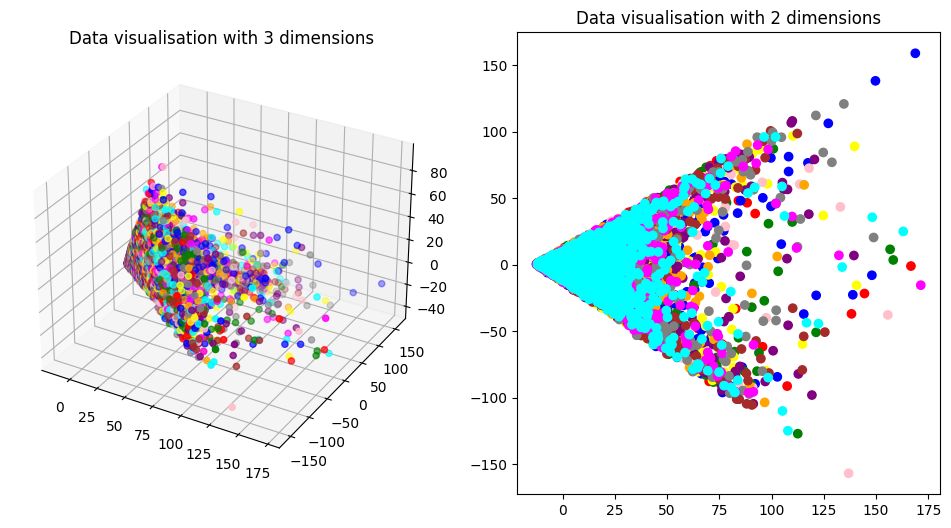

In [39]:
fig = plt.figure()
ax = plt.subplot(1, 2, 1, projection ='3d')
ax.scatter(X_WO_PCA3[0], X_WO_PCA3[1], X_WO_PCA3[2], c = y_WO, cmap=ListedColormap(color_list))
plt.title('Data visualisation with 3 dimensions')

plt.subplot(1, 2, 2)
plt.scatter(X_WO_PCA2[0], X_WO_PCA2[1], c = y_WO, cmap=ListedColormap(color_list))
plt.title('Data visualisation with 2 dimensions')
plt.show()

In [40]:
#vidimo da sada nema outlier-a koji ce previse uticati na rezultat

In [41]:
%store X_WO

Stored 'X_WO' (DataFrame)


In [42]:
%store y_WO

Stored 'y_WO' (Series)


In [43]:
X = X_WO
%store X

Stored 'X' (DataFrame)


In [44]:
y = y_WO
%store y

Stored 'y' (Series)


In [45]:
df = df_WO
%store df

Stored 'df' (DataFrame)


In [46]:
X_PCA3 = X_WO_PCA3
%store X_PCA3

Stored 'X_PCA3' (DataFrame)


In [47]:
X_PCA2 = X_WO_PCA2
%store X_PCA2

Stored 'X_PCA2' (DataFrame)
